패키지

In [167]:
# 분석
import pandas as pd
import numpy as np
import scipy.stats as stats
import string

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 머신러닝 패키지
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor

In [168]:
df = pd.read_excel("./data/activity_sample.xlsx")
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [169]:
df.shape

(6476, 45)

In [170]:
for i in df.columns:
    print(i)

Unnamed: 0
userid
learning_seq
mcode
learning_action_seq
event_type
action
object_type
timestamp
gender
grade
memberstatus
memberstatus_change
day_01_status
day_02_status
day_03_status
day_04_status
day_05_status
day_06_status
day_07_status
day_08_status
day_09_status
day_10_status
day_11_status
day_12_status
day_13_status
day_14_status
day_15_status
day_16_status
day_17_status
day_18_status
day_19_status
day_20_status
day_21_status
day_22_status
day_23_status
day_24_status
day_25_status
day_26_status
day_27_status
day_28_status
day_29_status
day_30_status
day_31_status
change_date


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           6476 non-null   int64         
 1   userid               6476 non-null   object        
 2   learning_seq         6476 non-null   int64         
 3   mcode                6476 non-null   object        
 4   learning_action_seq  6476 non-null   int64         
 5   event_type           6476 non-null   object        
 6   action               6476 non-null   object        
 7   object_type          6476 non-null   object        
 8   timestamp            6476 non-null   datetime64[ns]
 9   gender               6476 non-null   object        
 10  grade                6476 non-null   int64         
 11  memberstatus         6476 non-null   int64         
 12  memberstatus_change  6476 non-null   object        
 13  day_01_status        6476 non-nul

In [172]:
df["action"].unique()

array(['Viewed', 'NavigatedTo', 'Started', 'JumpedTo', 'Ended',
       'ChangedVolume', 'Restarted', 'ChangedSpeed', 'Paused', 'Resumed'],
      dtype=object)

In [163]:
df["event_type"].unique()

array(['ViewEvent', 'NavigationEvent', 'MediaEvent'], dtype=object)

중복, 결측치 확인

In [175]:
df["userid"].duplicated().sum()

6446

In [176]:
df["userid"].nunique()

# 30명에 대한 활동 데이터

30

In [177]:
df["userid"].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [178]:
df.isnull().sum()

Unnamed: 0             0
userid                 0
learning_seq           0
mcode                  0
learning_action_seq    0
event_type             0
action                 0
object_type            0
timestamp              0
gender                 0
grade                  0
memberstatus           0
memberstatus_change    0
day_01_status          0
day_02_status          0
day_03_status          0
day_04_status          0
day_05_status          0
day_06_status          0
day_07_status          0
day_08_status          0
day_09_status          0
day_10_status          0
day_11_status          0
day_12_status          0
day_13_status          0
day_14_status          0
day_15_status          0
day_16_status          0
day_17_status          0
day_18_status          0
day_19_status          0
day_20_status          0
day_21_status          0
day_22_status          0
day_23_status          0
day_24_status          0
day_25_status          0
day_26_status          0
day_27_status          0


결측치가 없다?

In [179]:
df["object_type"].unique()

array(['DigitalResource', 'VideoObject', 'WebPage'], dtype=object)

In [ ]:
df["grade"].unique()

# 전부 5학년에 대한 데이터
# 즉 5학년 30명에 대한 자료이다

array([5], dtype=int64)

전처리

In [180]:
# 사람은 30명, 그 인원을 보다 쉽게 식별하기 위해서 변환시도

# 유니크 userid 추출
unique_userids = df["userid"].unique()

# stu1 ~ stu30까지의 리스트 생성
stu_labels = [f"stu{i}" for i in range(1, 31)]

# 유니크 userid와 stu 라벨을 매핑하는 딕셔너리 생성
userid_to_stu = dict(zip(unique_userids, stu_labels))

# userid를 stu 라벨로 변환한 새로운 컬럼 생성
df["userid_stu"] = df["userid"].map(userid_to_stu)

# 결과 확인
print(df[["userid", "userid_stu"]].head())

                                 userid userid_stu
0  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
1  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
2  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
3  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
4  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1


'_'0으로 바꾸기

In [181]:
df.replace("-", 0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1080\157977748.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', 0, inplace=True)


In [182]:
userid_counts = df["userid_stu"].value_counts()

# Box-Cox 변환 적용 (0 이상의 빈도수여야 적용 가능)
boxcox_transformed, _ = stats.boxcox(userid_counts)

# Box-Cox 변환된 값을 DataFrame에 추가
df_boxcox = pd.DataFrame(
    {
        "userid_stu": userid_counts.index,
        "original_count": userid_counts.values,
        "boxcox_count": boxcox_transformed,
    }
)

# df에 병합 (필요할 경우)
df = df.merge(df_boxcox, on="userid_stu")

# 결과 확인
print(df.head())

   Unnamed: 0                                userid  learning_seq  \
0        6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1        6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2        6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3        6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4        6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   

          mcode  learning_action_seq       event_type       action  \
0  T0TE52U01003                    1        ViewEvent       Viewed   
1  T0TE52U01003                    2  NavigationEvent  NavigatedTo   
2  T0TE52U01003                    3        ViewEvent       Viewed   
3  T0TE52U01003                    4  NavigationEvent  NavigatedTo   
4  T0TE52U01003                    5        ViewEvent       Viewed   

       object_type               timestamp gender  ...  day_26_status  \
0  DigitalResource 2022-09-14 23:28:53.150      M  ...             44   
1  DigitalResource

In [183]:
# 콘텐츠 타입에 따라 범주형 자료를 변환
df["object_type"][df["object_type"] == "DigitalResource"] = 2
df["object_type"][df["object_type"] == "VideoObject"] = 1
df["object_type"][df["object_type"] == "WebPage"] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_1080\620392318.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['object_type'][df['object_type'] == 'DigitalResource']=2
C:\Users\user\AppData\Local\Temp\ipykernel_1080\620392318.py:2: Setting

In [184]:
df["event_type"][df["event_type"] == "ViewEvent"] = 0
df["event_type"][df["event_type"] == "NavigationEvent"] = 1
df["event_type"][df["event_type"] == "MediaEvent"] = 2

C:\Users\user\AppData\Local\Temp\ipykernel_1080\376697085.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['event_type'][df['event_type']=='ViewEvent'] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_1080\376697085.py:1: SettingWithCopy

In [185]:
df["object_type"]

0       2
1       2
2       2
3       2
4       2
       ..
6471    2
6472    2
6473    2
6474    2
6475    2
Name: object_type, Length: 6476, dtype: object

In [186]:
num_ids = len(df["mcode"].unique())
np.random.seed(42)  # 재현 가능성을 위해 시드 설정
random_numbers = np.random.randint(low=1000, high=9999, size=num_ids)

# 콘텐츠 ID와 랜덤 숫자를 매핑합니다.
content_to_number = dict(zip(df["mcode"].unique(), random_numbers))

# 매핑을 데이터프레임에 적용합니다.
df["mcode_mapped"] = df["mcode"].map(content_to_number)

print(df)

      Unnamed: 0                                userid  learning_seq  \
0           6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1           6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2           6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3           6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4           6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
...          ...                                   ...           ...   
6471        3081  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6472        3082  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6473        3083  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6474        3084  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6475        3085  f157a6f8-c680-42bf-8b48-03744367f7b1             2   

             mcode  learning_action_seq event_type       action object_type  \
0     T0TE52U01003                    1          0      

EDA

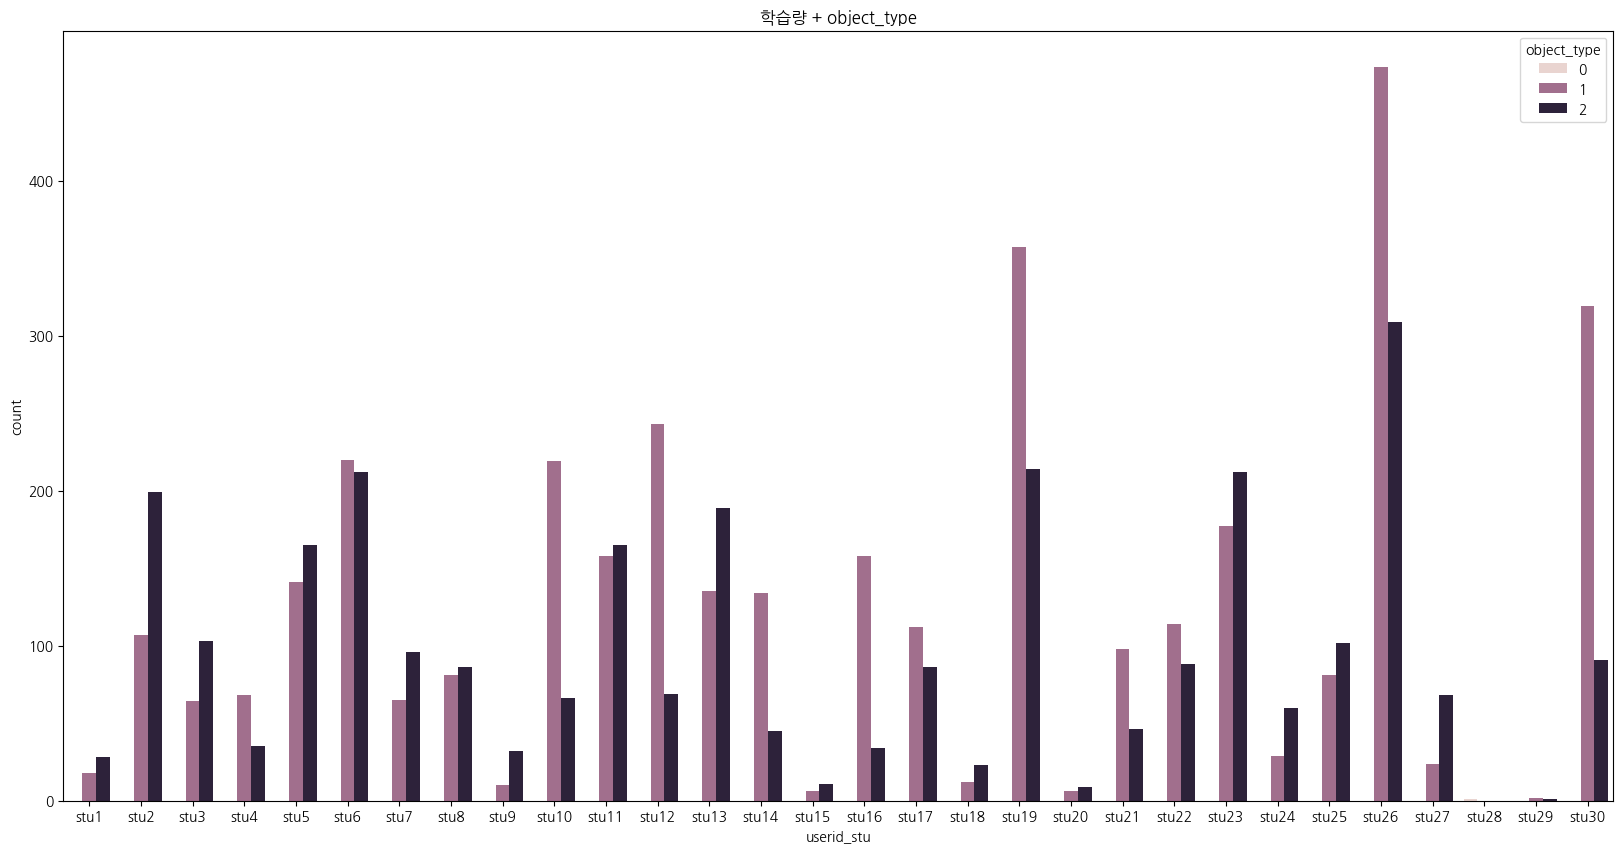

In [223]:
plt.figure(figsize=(20, 10))

sns.countplot(x="userid_stu", data=df, hue="object_type")
plt.title("학습량 + object_type")


# 플롯을 표시
plt.show()

30명에 대한 자료가 편향적임

C:\Users\user\AppData\Local\Temp\ipykernel_1080\2774012028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="userid_stu", y="userid_stu_standardized", data=df, palette="Set3")


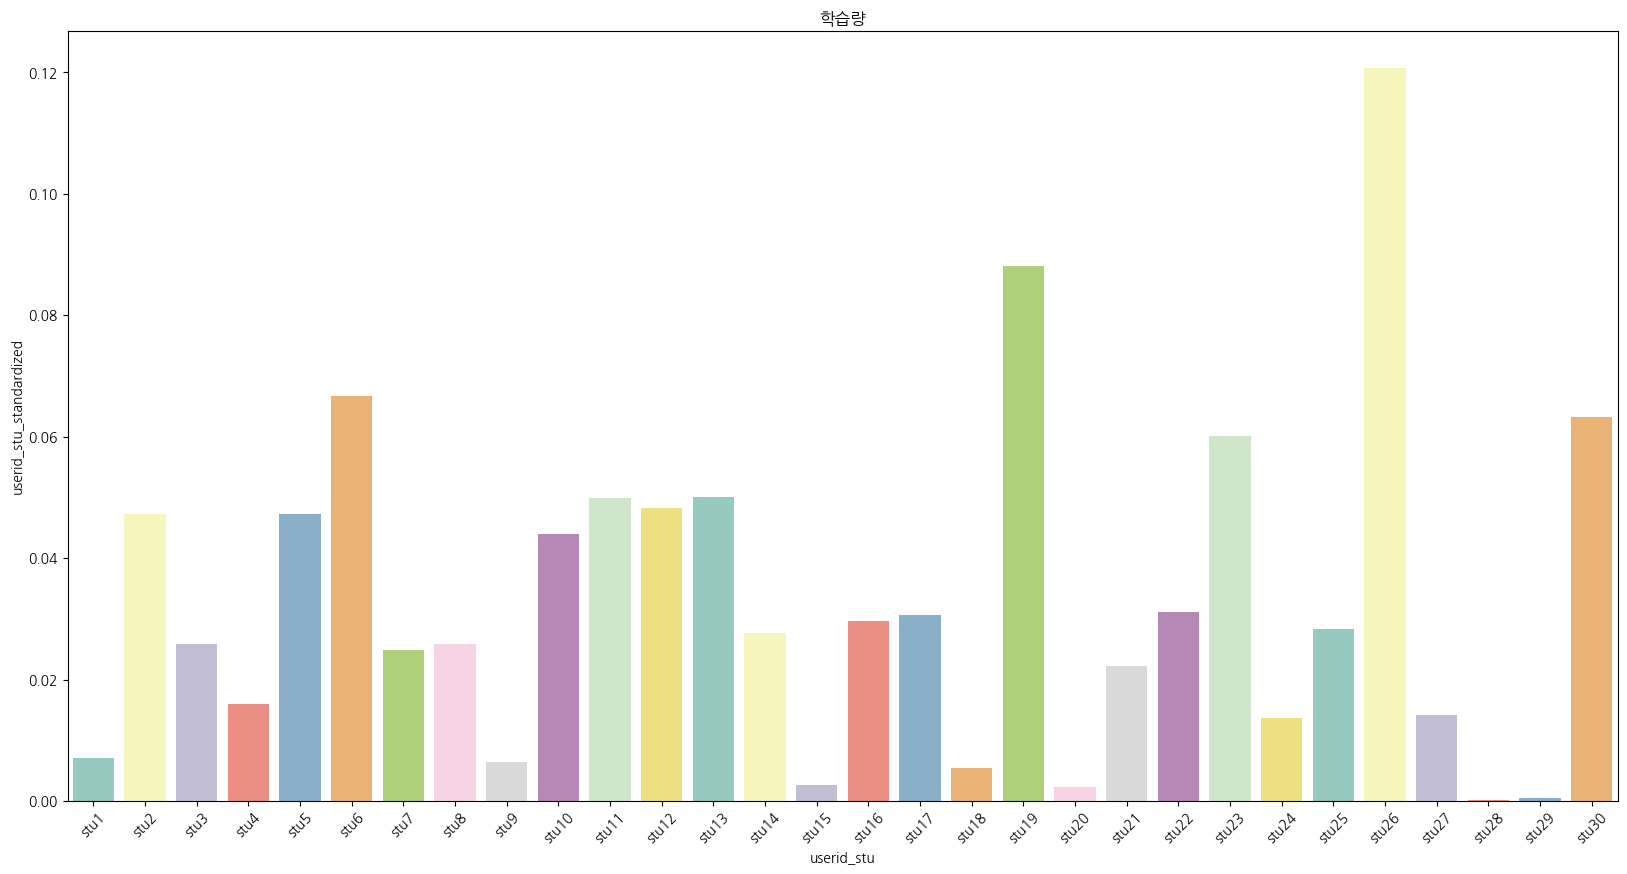

In [222]:
# 전체 행의 수
total_count = len(df)

# 각 stu 라벨의 빈도를 표준화하여 비율 계산
df["userid_stu_standardized"] = df["userid_stu"].map(
    df["userid_stu"].value_counts() / total_count
)

# 표준화된 값으로 플롯을 그림
plt.figure(figsize=(20, 10))
sns.barplot(x="userid_stu", y="userid_stu_standardized", data=df, palette="Set3")

# x축 라벨 회전

plt.xticks(rotation=45)
plt.title("학습량")
# 표준화된 플롯을 표시
plt.show()

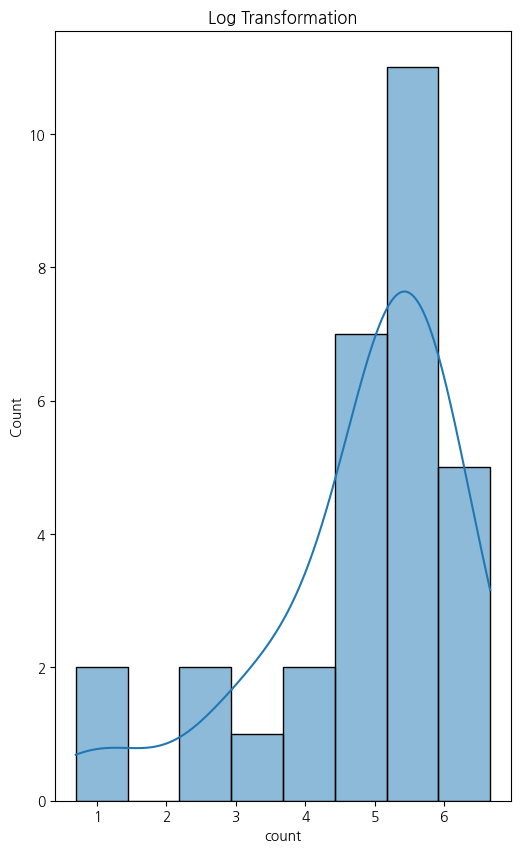

In [189]:
# Box-Cox 변환은 양수 값에만 적용 가능

userid_counts = df["userid_stu"].value_counts()
log_transformed = np.log1p(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.histplot(log_transformed, kde=True)
plt.title("Log Transformation")
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


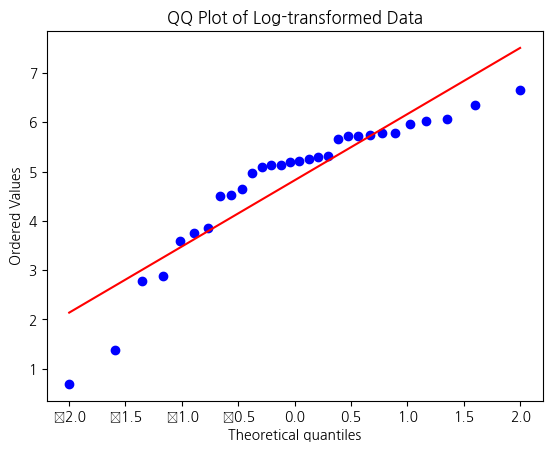

In [224]:
stats.probplot(log_transformed, dist="norm", plot=plt)
plt.title("QQ Plot of Log-transformed Data")
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box-Cox Transformation')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

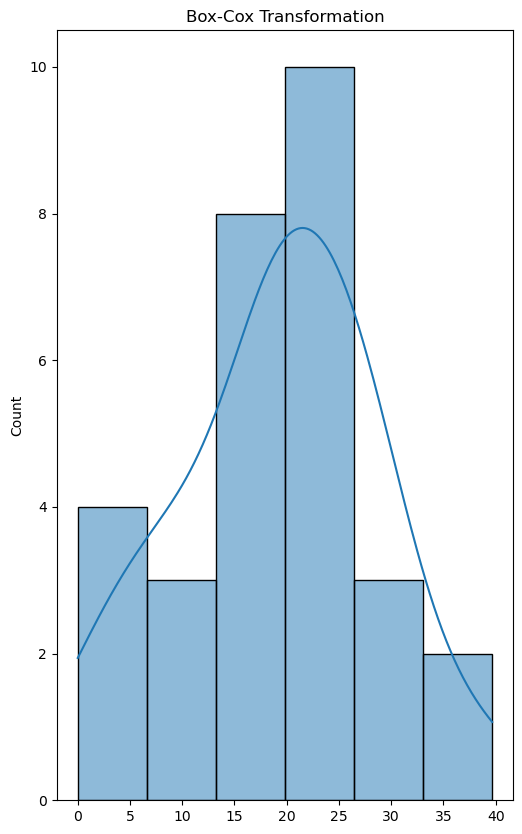

In [ ]:
# Box-Cox 변환은 양수 값에만 적용 가능
boxcox_transformed, _ = stats.boxcox(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 2)
sns.histplot(boxcox_transformed, kde=True)
plt.title("Box-Cox Transformation")

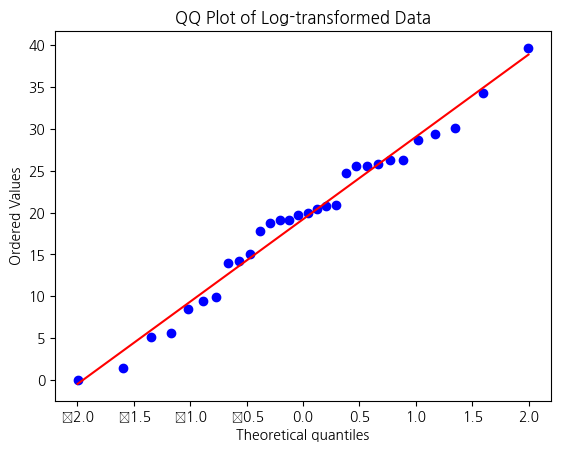

In [225]:
stats.probplot(boxcox_transformed, dist="norm", plot=plt)
plt.title("QQ Plot of Log-transformed Data")
plt.show()

In [190]:
df["boxcox_count"]

0        9.891947
1        9.891947
2        9.891947
3        9.891947
4        9.891947
          ...    
6471    29.359462
6472    29.359462
6473    29.359462
6474    29.359462
6475    29.359462
Name: boxcox_count, Length: 6476, dtype: float64

In [191]:
df["time_diff"] = df.groupby("mcode")["timestamp"].diff()

In [198]:
df["time_diff"] = df["time_diff"].fillna(pd.Timedelta(seconds=0))

# timedelta를 초로 변환
df["time_diff_seconds"] = df["time_diff"].dt.total_seconds().astype(int)

# timedelta를 밀리초로 변환
df["time_diff_milliseconds"] = (df["time_diff"].dt.total_seconds() * 1000).astype(int)

# timedelta를 분으로 변환
df["time_diff_minutes"] = (df["time_diff"].dt.total_seconds() / 60).astype(int)

# timedelta를 시간으로 변환
df["time_diff_hours"] = (df["time_diff"].dt.total_seconds() / 3600).astype(int)

print(df)

      Unnamed: 0                                userid  learning_seq  \
0           6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1           6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2           6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3           6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4           6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
...          ...                                   ...           ...   
6471        3081  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6472        3082  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6473        3083  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6474        3084  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6475        3085  f157a6f8-c680-42bf-8b48-03744367f7b1             2   

             mcode  learning_action_seq event_type       action object_type  \
0     T0TE52U01003                    1          0      

C:\Users\user\AppData\Local\Temp\ipykernel_1080\976964296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='userid_stu', y='time_diff', data=df,palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_1080\976964296.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


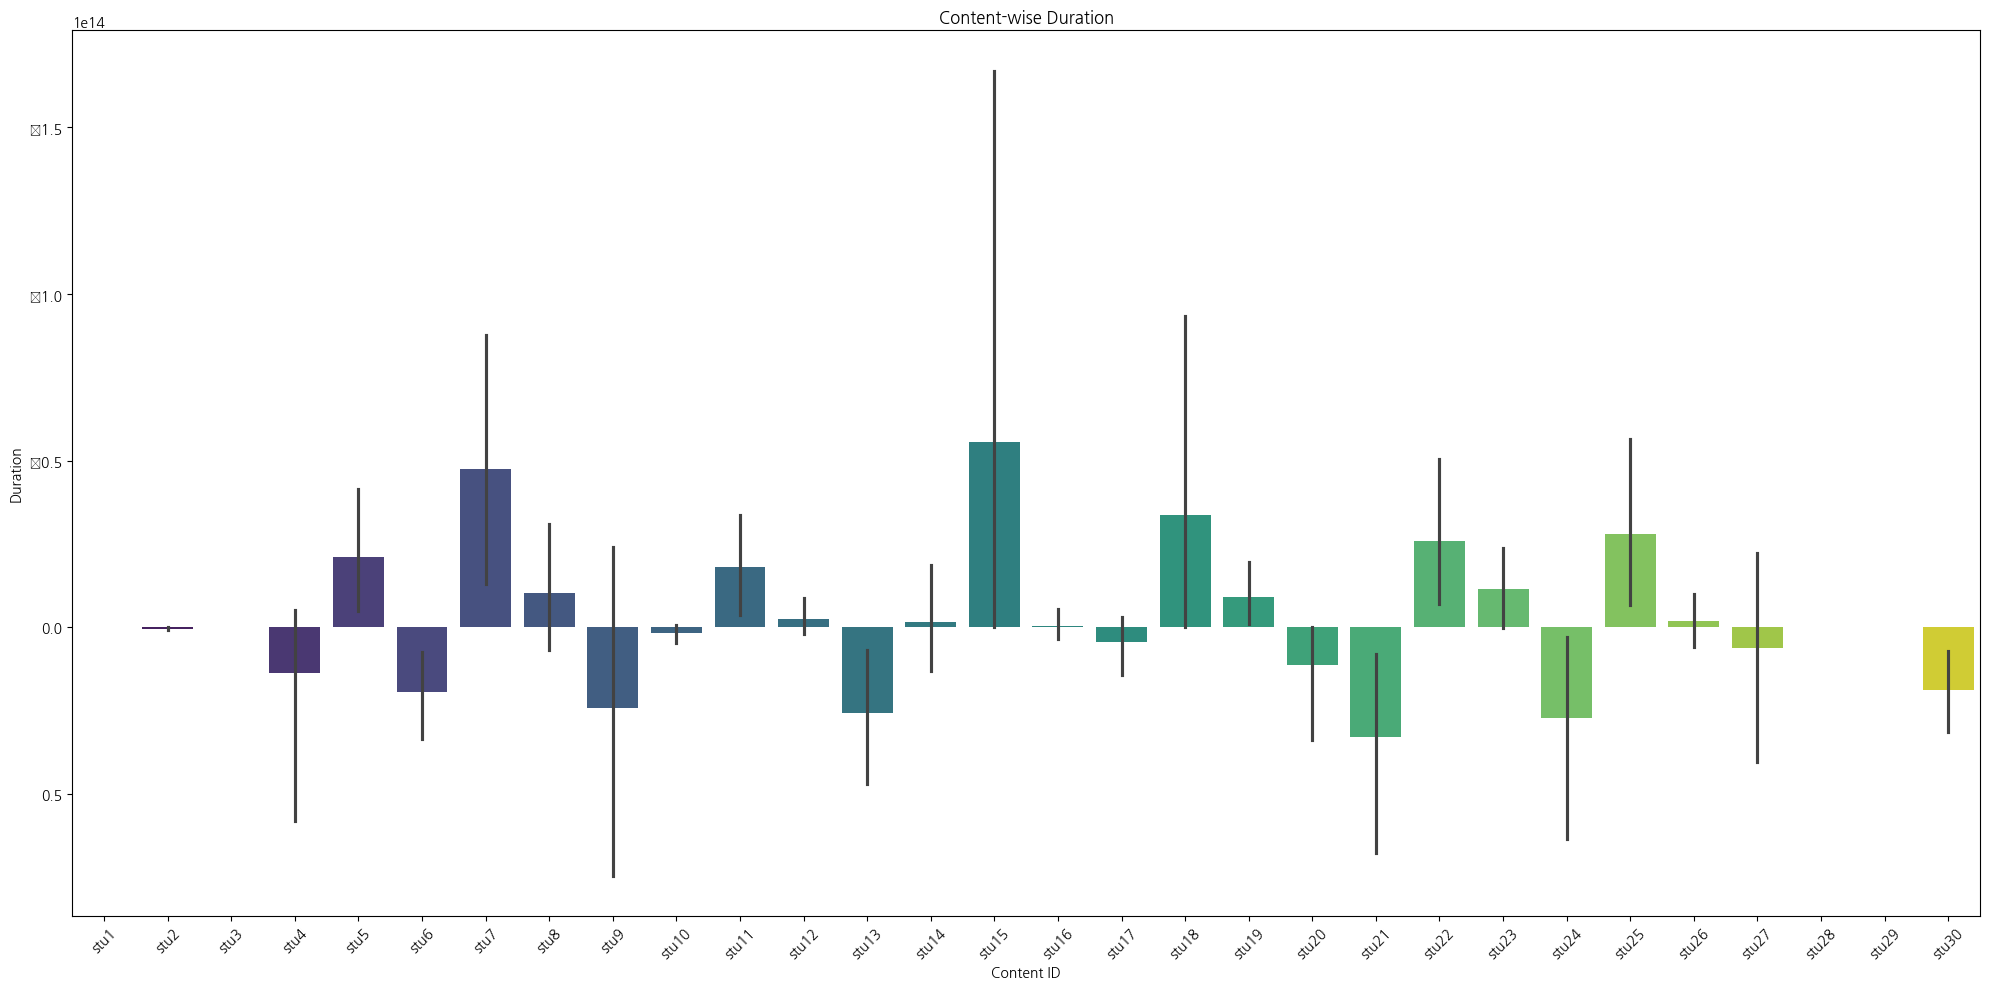

In [192]:
plt.figure(figsize=(20, 10))
sns.barplot(x="userid_stu", y="time_diff", data=df, palette="viridis")
plt.title("Content-wise Duration")
plt.xlabel("Content ID")
plt.ylabel("Duration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

학생이 학습량에 대한 부분을 박스콕스 변환까지 실시

모델 생성

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               6476 non-null   int64          
 1   userid                   6476 non-null   object         
 2   learning_seq             6476 non-null   int64          
 3   mcode                    6476 non-null   object         
 4   learning_action_seq      6476 non-null   int64          
 5   event_type               6476 non-null   object         
 6   action                   6476 non-null   object         
 7   object_type              6476 non-null   object         
 8   timestamp                6476 non-null   datetime64[ns] 
 9   gender                   6476 non-null   object         
 10  grade                    6476 non-null   int64          
 11  memberstatus             6476 non-null   int64          
 12  memberstatus_change 

In [196]:
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_29_status,day_30_status,day_31_status,change_date,userid_stu,original_count,boxcox_count,mcode_mapped,userid_stu_standardized,time_diff
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,0,Viewed,2,2022-09-14 23:28:53.150,M,...,44,44,999,25,stu1,46,9.891947,8270,0.007103,NaT
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,1,NavigatedTo,2,2022-09-14 23:30:09.481,M,...,44,44,999,25,stu1,46,9.891947,8270,0.007103,0 days 00:01:16.331000
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,0,Viewed,2,2022-09-14 23:30:09.604,M,...,44,44,999,25,stu1,46,9.891947,8270,0.007103,0 days 00:00:00.123000
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,1,NavigatedTo,2,2022-09-14 23:30:43.752,M,...,44,44,999,25,stu1,46,9.891947,8270,0.007103,0 days 00:00:34.148000
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,0,Viewed,2,2022-09-14 23:30:43.883,M,...,44,44,999,25,stu1,46,9.891947,8270,0.007103,0 days 00:00:00.131000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,0,Viewed,2,2022-09-21 10:26:18.026,M,...,44,44,999,27,stu30,410,29.359462,2528,0.063311,0 days 00:00:15.816000
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,1,NavigatedTo,2,2022-09-21 10:26:18.280,M,...,44,44,999,27,stu30,410,29.359462,2528,0.063311,0 days 00:00:00.254000
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,0,Viewed,2,2022-09-21 10:26:18.366,M,...,44,44,999,27,stu30,410,29.359462,2528,0.063311,0 days 00:00:00.086000
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,1,NavigatedTo,2,2022-09-21 10:26:40.089,M,...,44,44,999,27,stu30,410,29.359462,2528,0.063311,0 days 00:00:21.723000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               6476 non-null   int64          
 1   userid                   6476 non-null   object         
 2   learning_seq             6476 non-null   int64          
 3   mcode                    6476 non-null   object         
 4   learning_action_seq      6476 non-null   int64          
 5   event_type               6476 non-null   object         
 6   action                   6476 non-null   object         
 7   object_type              6476 non-null   object         
 8   timestamp                6476 non-null   datetime64[ns] 
 9   gender                   6476 non-null   object         
 10  grade                    6476 non-null   int64          
 11  memberstatus             6476 non-null   int64          
 12  memberstatus_change 

In [256]:
X = df.loc[
    :,
    [
        "learning_action_seq",
        "learning_seq",
        "event_type",
        "object_type",
        "mcode_mapped",
        "time_diff_seconds",
    ],
]

y = df["change_date"]


# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [257]:
# 4. 모델 선택 및 학습
# RandomForestRegressor 모델 사용
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# 5. 모델 평가
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.6550925925925926
0.9467181467181467


In [258]:
model.feature_importances_

array([0.19304549, 0.2132433 , 0.01717879, 0.00809101, 0.45528213,
       0.11315927])

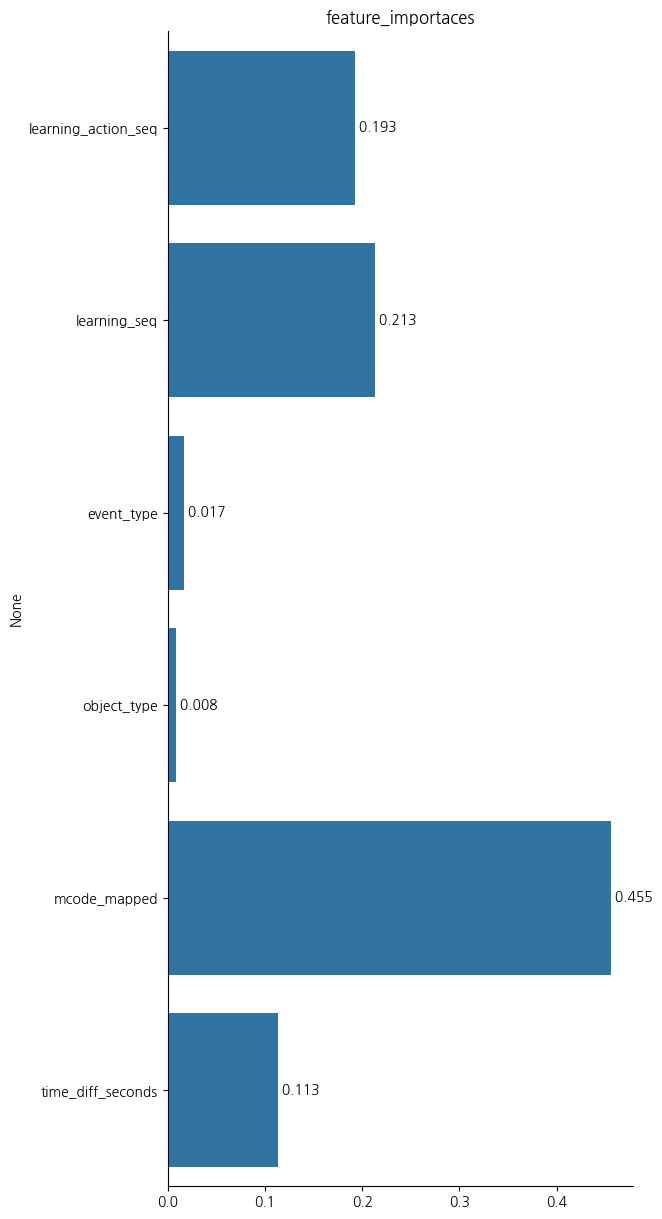

In [259]:
plt.figure(figsize=(6, 15))
ax = sns.barplot(x=model.feature_importances_, y=X.columns)
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("feature_importaces")
plt.show()

In [255]:
y_pred = model.predict(X_test)
mat = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,10,11
0,53,1,0,0,0,0,0,0,0,0,0,0
1,0,228,0,0,0,1,0,0,1,0,0,0
2,0,0,104,0,0,0,0,0,0,0,0,0
3,0,0,0,159,0,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,0,0
5,0,0,1,0,0,162,0,0,0,0,0,0
6,0,0,1,0,0,0,186,0,0,0,0,0
7,0,0,0,0,0,0,0,13,0,0,0,0
8,0,2,0,1,0,1,0,1,190,0,0,0
9,0,0,0,0,0,0,0,0,0,20,0,0
